### Importing the Libraries

In [ ]:
## https://www.kaggle.com/datasets/basilb2s/language-detection

In [208]:
# pandas is used for data manipulation and analysis, especially with tabular data (DataFrames).
import pandas as pd

# numpy is used for numerical operations and working with arrays.
import numpy as np

# re is the built-in Python library for working with regular expressions (useful for text cleaning).
import re

# seaborn is a data visualization library based on matplotlib; it provides high-level interface for drawing attractive graphs.
import seaborn as sns

# matplotlib.pyplot is a popular plotting library used to create static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# pickle is used for serializing and saving Python objects (like models or preprocessed data) to disk, and loading them back.
import pickle

# warnings is a built-in library to handle warning messages. This line suppresses warnings from appearing in output.
import warnings
warnings.simplefilter("ignore")


In [209]:
# Loading the dataset into a pandas DataFrame from a CSV file named 'language_detection.csv'.
# This file likely contains text samples and their corresponding language labels for training a language detection model.
data = pd.read_csv("language_detection.csv")


In [210]:
# Displays the first 10 rows of the dataset to get an initial look at the data structure, columns, and sample values.
data.head(10)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [211]:
# Returns the count of occurrences for each unique language in the "Language" column.
# Useful for understanding the distribution of language labels in the dataset — e.g., how many samples per language.
data["Language"].value_counts()


English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [212]:
# Separating the features (independent variable) and labels (dependent variable).
# 'X' contains the input text samples, which will be used to train the model.
# 'y' contains the corresponding language labels, which the model will learn to predict.
X = data["Text"]
y = data["Language"]


In [213]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [214]:
X

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [215]:
# Converting categorical labels (language names) into numeric form using LabelEncoder.
# Many machine learning algorithms require the target variable to be in numeric format.
# For example, 'English' might become 0, 'French' becomes 1, and so on.
# LabelEncoder() creates an object that can convert categorical text labels (like language names) into numeric form (like 0, 1, 2, etc.).
# le is a shorthand name for this encoder — commonly used in practice, but you could name it anything like label_encoder for more clarity.
# It fits the LabelEncoder on the original y values (which are strings like "English", "French", etc.), learning all the unique classes.
# It then transforms those text labels into numerical values (e.g., 0, 1, 2, ...).
# Finally, it assigns the transformed result back to the variable y.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [216]:
y

array([3, 3, 3, ..., 9, 9, 9])

### Text preprocessing

In [217]:
# Preprocessing the text data:
# - Loop through each text in the dataset
# - Remove unwanted characters and numbers using regular expressions
# - Convert all text to lowercase to maintain consistency
# - Append the cleaned text to a new list called data_list
# It helps normalize the text for training the model.
# Removing punctuation and digits reduces noise.
# Lowercasing makes sure that "Hello" and "hello" are treated the same.

data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)  # Remove special characters and digits
    text = re.sub(r'[[]]', ' ', text)  # Remove square brackets
    text = text.lower()  # Convert text to lowercase
    data_list.append(text)  # Store the cleaned text



In [218]:
# Splitting the dataset into training and testing sets using train_test_split from scikit-learn.
# - X and y are divided into training and test subsets.
# - 80% of the data will be used for training, and 20% will be used for testing (test_size = 0.20).
# - This helps evaluate how well the model performs on unseen data.
# The model is trained on x_train, y_train.
# It is validated/tested on x_test, y_test to check generalization and avoid overfitting.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


### Bag of Words

In [219]:
# Creating a Bag of Words representation using CountVectorizer.
# This converts the cleaned text data into a numerical format by counting the occurrence of each word (token) in the dataset.
# Each row in 'X' now represents a text sample, and each column represents a unique word from the entire dataset vocabulary.
# The result is stored as a dense NumPy array.
# The model can't work directly with text — it needs numerical input.
# CountVectorizer builds a vocabulary of all words and represents each text by the frequency of those words (this is the "Bag of Words" model).

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train = cv.transform(X_train).toarray()
x_test = cv.transform(X_test).toarray()


### Train Test split

### Model creation and Prediction

In [220]:
# Importing and training a Multinomial Naive Bayes model.
# - MultinomialNB is well-suited for text classification tasks, especially when using word frequency features like Bag of Words.
# - The model is trained using the training data (x_train and y_train).
# Multinomial Naive Bayes is particularly effective for document classification, like spam filtering or language detection.
# It works well with discrete features, such as word counts.
# Discrete features are variables that take on distinct, separate values — typically whole numbers — with no intermediate values between them.

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)


MultinomialNB()

In [221]:
# Making predictions using the trained model on the test dataset.
# - The model is used to predict the language labels (y_pred) for the test data (x_test).
# - The predicted labels are stored in y_pred, which can later be compared with the actual labels (y_test) for evaluation.

y_pred = model.predict(x_test)


### Evaluating the model

In [222]:
# Evaluating the model's performance using various metrics.
# - accuracy_score computes the proportion of correctly predicted labels.
# - confusion_matrix provides a detailed matrix showing the true positives, false positives, true negatives, and false negatives.
# - classification_report generates a detailed report including precision, recall, f1-score for each class.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix to analyze the prediction errors
cr = classification_report(y_test, y_pred)  # Generate the classification report with precision, recall, and f1-score


In [223]:
# Printing the accuracy of the model on the test dataset.
# - This will display the proportion of correctly predicted labels (from the accuracy_score metric).
# - It gives an overall indication of the model's performance.

print("Accuracy is :", ac)


Accuracy is : 0.973404255319149


In [224]:
# Import the Pipeline class from scikit-learn to build a sequence of steps for preprocessing and modeling
from sklearn.pipeline import Pipeline

# Create a pipeline object with two steps:
# Step 1: 'vectorizer' applies a text vectorizer (like CountVectorizer or TfidfVectorizer) to transform raw text into numeric features.
# Step 2: 'multinomialNB' applies a Multinomial Naive Bayes model to perform classification.

# The Pipeline lets you chain preprocessing and modeling steps so you can treat the entire flow as a single object. This is helpful for cleaner code, cross-validation, and deployment.

pipe = Pipeline([
    ('vectorizer', cv),           # 'cv' should be an instance of CountVectorizer or TfidfVectorizer
    ('multinomialNB', model)      # 'model' should be an instance of MultinomialNB (or any classifier)
])

# Fit the pipeline on the training data.
# It first transforms the text using the vectorizer, then trains the classifier on the resulting features.
pipe.fit(X_train, y_train)        # X_train must be a list/Series of strings (text), and y_train the corresponding labels



Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [226]:
# Use the trained pipeline to make predictions on the test data
# This will first vectorize the X_test text using the same vectorizer used in training,
# then use the trained classifier to predict the labels
y_pred2 = pipe.predict(X_test)

# Calculate the accuracy of the model by comparing predicted labels with the true labels
# accuracy_score returns the fraction of correct predictions over total predictions
ac2 = accuracy_score(y_test, y_pred2)

# Print the accuracy result
print("Accuracy is :", ac2)


Accuracy is : 0.973404255319149


In [95]:
# Printing the classification report for the model.
# - This report includes precision, recall, F1-score, and support for each class.
# - It provides a more detailed performance analysis for each class, beyond just accuracy.
# The classification report provides a detailed breakdown of the model's performance on each class.
# Precision measures how many of the predicted positive instances are actually positive.
# Recall shows how many of the actual positive instances were identified by the model.
# F1-score is the harmonic mean of precision and recall, providing a single metric to evaluate the model.
# Support is the number of true instances for each class, which helps understand the distribution.

print(cr)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.99      0.93      0.96        96
           2       1.00      0.97      0.98       115
           3       0.90      1.00      0.95       296
           4       0.99      1.00      0.99       203
           5       1.00      0.97      0.99       103
           6       1.00      0.97      0.99        68
           7       1.00      1.00      1.00        13
           8       0.99      0.99      0.99       135
           9       1.00      0.95      0.97        81
          10       0.99      0.99      0.99       104
          11       1.00      0.98      0.99       128
          12       1.00      0.98      0.99       132
          13       0.99      0.99      0.99       185
          14       0.99      0.98      0.98       143
          15       1.00      0.97      0.98        86
          16       1.00      0.95      0.97        80

    accuracy              

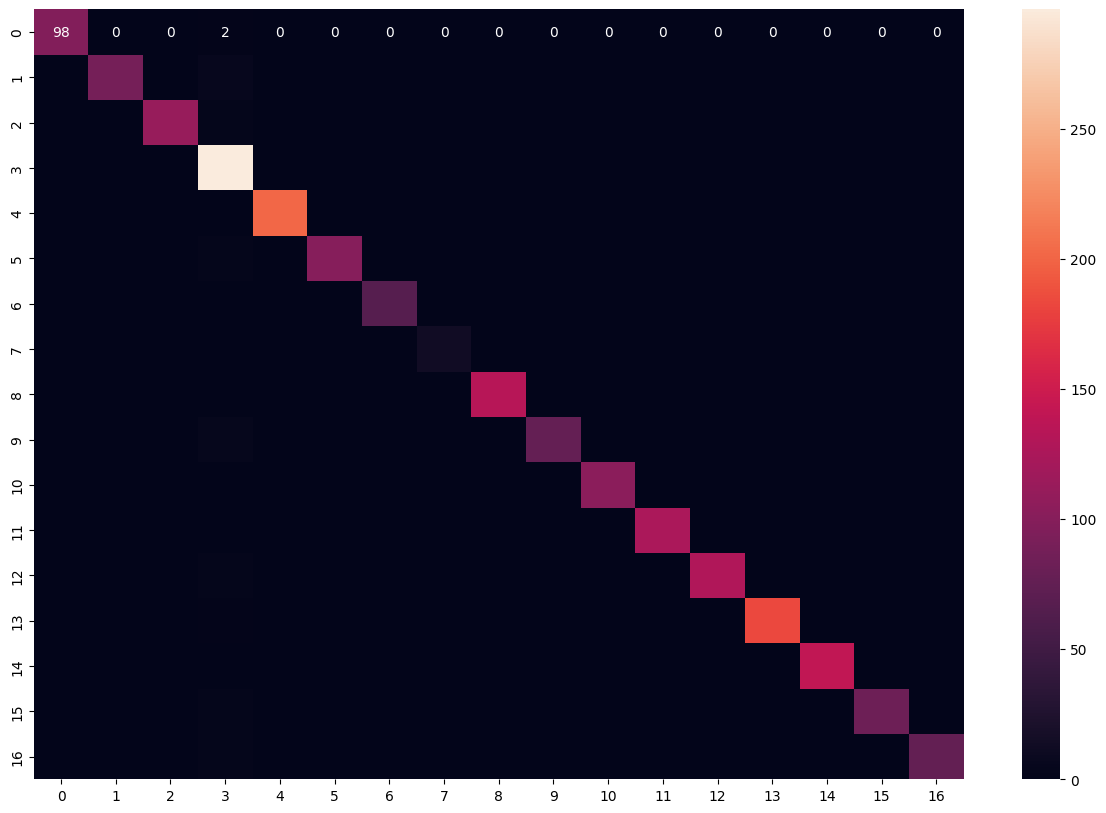

In [96]:
# Visualizing the confusion matrix using a heatmap.
# - The confusion matrix (cm) is displayed as a heatmap for better interpretation.
# - The 'annot=True' argument adds the numerical values to each cell in the heatmap.
# - The figure size is adjusted to make the plot more readable, and plt.show() displays the plot.

plt.figure(figsize=(15,10))  # Set the figure size for better visibility
sns.heatmap(cm, annot=True)  # Create a heatmap of the confusion matrix with annotations
plt.show()  # Display the plot


### Model Saving

In [230]:
# Save the trained pipeline (which includes both the vectorizer and classifier)
# to a file for later reuse without needing to retrain

# '0.1.0' in the filename indicates the version of the saved model (semantic versioning: MAJOR.MINOR.PATCH)
with open('trained_pipeline-0.1.0.pkl', 'wb') as f:
    pickle.dump(pipe, f)  # Serialize and save the pipeline object to the file


In [235]:
# Define a test string (text input) to classify
# test = "Hello, how are you?"

# Overwrite the test string with a new message in Italian
test = "ciao, come stai?"

# (This line is commented out) You could test a different English sentence as well
# test = "Hi, how are you?"

# Use the trained pipeline to predict the label of the test string
# The pipeline will:
# 1. Vectorize the string using the same vectorizer used during training
# 2. Pass the vectorized input to the trained classifier
y = pipe.predict([test])  # Note: test must be in a list or array-like form

# Convert the predicted numeric label back to its original class name using the label encoder
# le.classes_ contains the original class names in order
# y[0] is the predicted class index
le.classes_[y[0]], y  # Output: (predicted class label as string, predicted index as array)


('Italian', array([8]))

In [2]:
import sklearn
sklearn.__version__

'1.6.1'